# EPL 선수 분석

## EPL
영국 잉글랜드의 프로 축구 최상위의 리그이며, 박지성, 기성용, 이청용 등 유명한 해외파 선수가 몸담고 있었던 리그이다.
현재는 손흥민 선수가 유일하며 경기 템포가 빨라서 시청자 입장에서 속도감을 느낄 수 있으며 거친 파울로도 유명한 리그이다.

<br>
<br>

# 1. 데이터 수집

## a. 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set(color_codes=True)
sns.set(style='darkgrid')

mpl.rc('font', family='Malgun Gothic')

In [2]:
df = pd.read_csv('./epl_soccer_data.csv') # 분석 해야할 csv 파일을 불러옵니다.

In [3]:
df.head() # head 함수를 이용해 분석하고자 하는 데이터의 행과 열을 확인합니다. (상위 N개, 기본값 5개)

,Unnamed: 0,Name,Team,Age,Position,Apps,Mins,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,Rating
0,0,Harry Kane,"Tottenham,",27,", AM(C),FW",35,3087,23,14,3.9,1.4,1.5,1.7,0.4,1.5,1.8,7.79
1,1,Kevin De Bruyne,"Man City,",29,", M(CLR),FW",23(2),2001,6,12,3.2,3.2,1.9,1.2,0.0,1.3,1.8,7.65
2,2,Jack Grealish,"Aston Villa,",25,", AM(CL)",24(2),2184,6,10,1.9,3.1,2.5,4.2,0.3,1.5,2.1,7.56
3,3,Bruno Fernandes,"Man Utd,",26,", M(CLR)",35(2),3110,18,12,3.3,2.6,0.6,1.4,0.1,1.0,1.5,7.43
4,4,Tomas Soucek,"West Ham,",26,", DMC",38,3420,10,1,1.7,0.5,0.4,1.1,0.1,0.6,1.1,7.36


## b. 데이터 전처리

In [4]:
df = df.drop('Unnamed: 0', axis=1) # 분석에 필요 없는 Unnamed 컬럼을 열을 기준으로 삭제합니다.

In [5]:
df['Team'] = df['Team'].str.replace(',','') # Team 열의 마지막 부분에 남아있는 , 를 '' 빈 공간으로 변환해 줍니다.

In [6]:
df['Position'] = df['Position'].str[2:] # Position 열의 문자열을 2번째부터 끝까지만 사용합니다.(앞에 쉼표가 포함되기 때문에)

In [7]:
df['Apps'] = df['Apps'].astype(str).str.replace(r"\(.*\)", "").astype(int) # Apps 열의 문자열 중 ()가 포함되어 있는 부분을 삭제한 뒤 int 형식으로 변환해 줍니다.

In [8]:
df # 데이터 분석에 불필요한 부분들을 깔끔하게 변환한 뒤 분석을 시작합니다.

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,Rating
0,Harry Kane,Tottenham,27,"AM(C),FW",35,3087,23,14,3.9,1.4,1.5,1.7,0.4,1.5,1.8,7.79
1,Kevin De Bruyne,Man City,29,"M(CLR),FW",23,2001,6,12,3.2,3.2,1.9,1.2,0.0,1.3,1.8,7.65
2,Jack Grealish,Aston Villa,25,AM(CL),24,2184,6,10,1.9,3.1,2.5,4.2,0.3,1.5,2.1,7.56
3,Bruno Fernandes,Man Utd,26,M(CLR),35,3110,18,12,3.3,2.6,0.6,1.4,0.1,1.0,1.5,7.43
4,Tomas Soucek,West Ham,26,DMC,38,3420,10,1,1.7,0.5,0.4,1.1,0.1,0.6,1.1,7.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Allan Tchaptchet,Southampton,19,Defender,0,12,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.74
528,Odion Ighalo,Man Utd,31,"AM(C),FW",0,9,0,0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,5.74
529,Alexandre Jankewitz,Southampton,19,Midfielder,1,3,0,0,0.0,0.0,0.0,0.5,0.0,0.0,0.5,5.68
530,Willy Caballero,Chelsea,39,GK,1,90,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.41


| 컬럼 명 |  컬럼 의미 |
|--------|-----------|
| Name | 이름 |
| Team | 소속팀 |
| Age | 나이 |
| Position | 포지션 |
| Apps  | 출전 경기 수 |
| Mins | 출전 시간 |
| Goals | 총 골 수 |
| Assists  | 총 도움 수 |
| SpG | 경기당 슛 횟수 |
| KeyP | 경기당 키 패스 횟수 |
| Drb | 경기당 드리블 횟수 |
| Fouled | 경기당 피파울 횟수 |
| Off | 경기당 오프사이드 횟수 |
| Disp | 경기당 볼 소유권을 잃은 횟수 |
| UnsTch | 경기당 볼 컨트롤 미스 횟수 |
| Rating | 평점 |

#### 분석 순서
- 1. 히트맵 상관관계의 따른 그래프 분석
- 2. 출전 시간 1000분을 기준으로 상위(30) 선수 분석
- 3. 머신러닝 회귀 분석으로 평점 예측

In [9]:
df.info() # info 함수로 전반적인 데이터의 정보를 확인합니다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532 entries, 0 to 531
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      532 non-null    object 
 1   Team      532 non-null    object 
 2   Age       532 non-null    int64  
 3   Position  532 non-null    object 
 4   Apps      532 non-null    int32  
 5   Mins      532 non-null    int64  
 6   Goals     532 non-null    int64  
 7   Assists   532 non-null    int64  
 8   SpG       532 non-null    float64
 9   KeyP      532 non-null    float64
 10  Drb       532 non-null    float64
 11  Fouled    532 non-null    float64
 12  Off       532 non-null    float64
 13  Disp      532 non-null    float64
 14  UnsTch    532 non-null    float64
 15  Rating    532 non-null    float64
dtypes: float64(8), int32(1), int64(4), object(3)
memory usage: 64.5+ KB


In [10]:
df['Goals'] =  (df['Goals'] / df['Mins']) * 90 # 정수인 골 열을 출전 시간으로 나눈 뒤 축구의 정규 시간인 90을 곱합니다.

In [11]:
df['Assists'] =  (df['Assists'] / df['Mins']) * 90 # 정수인 어시스트 열을 출전 시간으로 나눈 뒤 축구의 정규 시간인 90을 곱합니다.

In [12]:
df['Goals'] = df['Goals'].round(2) # 소수점 2자리까지 보여줍니다.
df['Assists'] = df['Assists'].round(2) # 소수점 2자리까지 보여줍니다.

In [13]:
df

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,Rating
0,Harry Kane,Tottenham,27,"AM(C),FW",35,3087,0.67,0.41,3.9,1.4,1.5,1.7,0.4,1.5,1.8,7.79
1,Kevin De Bruyne,Man City,29,"M(CLR),FW",23,2001,0.27,0.54,3.2,3.2,1.9,1.2,0.0,1.3,1.8,7.65
2,Jack Grealish,Aston Villa,25,AM(CL),24,2184,0.25,0.41,1.9,3.1,2.5,4.2,0.3,1.5,2.1,7.56
3,Bruno Fernandes,Man Utd,26,M(CLR),35,3110,0.52,0.35,3.3,2.6,0.6,1.4,0.1,1.0,1.5,7.43
4,Tomas Soucek,West Ham,26,DMC,38,3420,0.26,0.03,1.7,0.5,0.4,1.1,0.1,0.6,1.1,7.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,Allan Tchaptchet,Southampton,19,Defender,0,12,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.74
528,Odion Ighalo,Man Utd,31,"AM(C),FW",0,9,0.00,0.00,0.0,0.0,0.0,0.0,0.0,2.0,1.0,5.74
529,Alexandre Jankewitz,Southampton,19,Midfielder,1,3,0.00,0.00,0.0,0.0,0.0,0.5,0.0,0.0,0.5,5.68
530,Willy Caballero,Chelsea,39,GK,1,90,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.41


<br>
<br>

## 1. 히트맵 상관관계의 따른 그래프 분석

<AxesSubplot:>

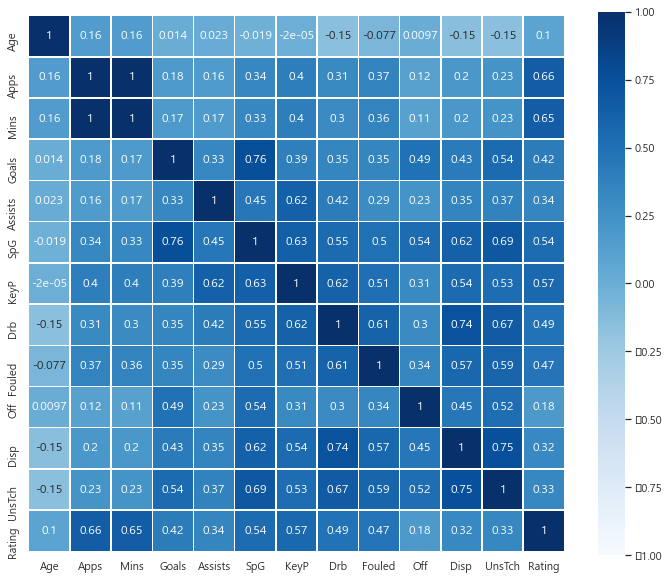

In [14]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),
            annot=True, # 셀 값 표기
           square=True, # 셀 정사각형으로 표기
            vmin=-1, # 최소값
            vmax=1, # 최대값
           linewidths=.5, # 셀 사이 선 간격 
            cmap='Blues') # 히트맵 색상

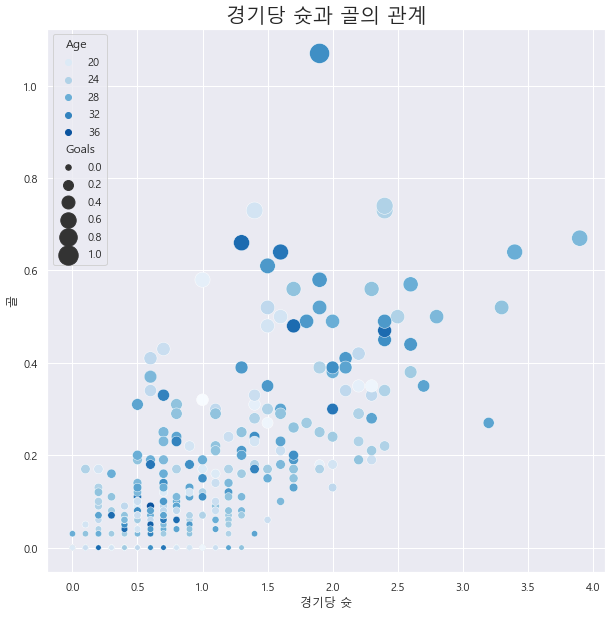

In [15]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, # 데이터를 불러옵니다.
                x='SpG', # x 축으로 경기당 슛 데이터를 불러옵니다.
                y='Goals', # y 축으로 골 데이터를 불러옵니다.
                hue='Age', # 나이를 기준으로 색상을 다르게 분류합니다.
                palette='Blues', # 색상을 설정합니다.
               size='Goals', # 골을 기준으로 크기를 다르게 분류합니다.
                sizes=(30,400))
plt.title('경기당 슛과 골의 관계', fontsize=(20))
plt.xlabel('경기당 슛')
plt.ylabel('골')
plt.show()

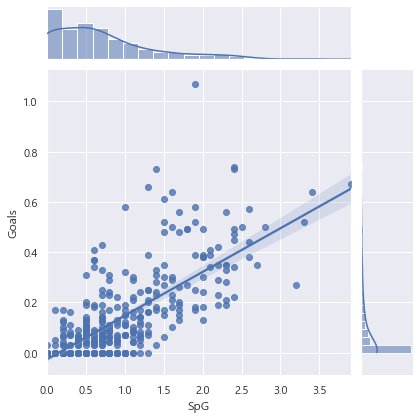

In [16]:
sns.jointplot(data=df, x='SpG', y='Goals', kind='reg')

<br>
<br>

### 경기당 슛의 비율이 높을수록 골의 수가 많아지는 것을 볼 수 있다. ( SpG 2.5 이상으로는 골의 정확성도 관련이 있는 것 같다.)

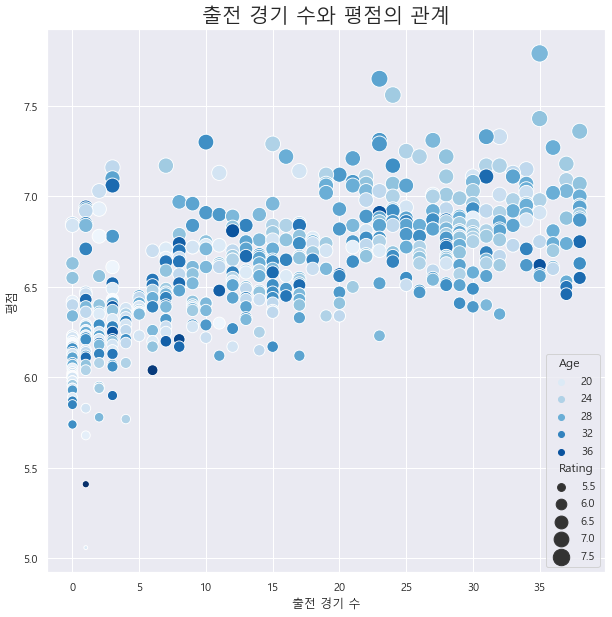

In [17]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, # 데이터를 불러옵니다. 
                x='Apps', # x 축으로 출전 경기 수 데이터를 불러옵니다.
                y='Rating',# y 축으로 평점 데이터를 불러옵니다.
                hue='Age', # 나이를 기준으로 색상을 다르게 분류합니다.
                palette='Blues', # 색상을 설정합니다.
                size='Rating', # 평점을을 기준으로 크기를 다르게 분류합니다.
                sizes=(15,300)
               )
plt.title('출전 경기 수와 평점의 관계', fontsize=(20))
plt.xlabel('출전 경기 수')
plt.ylabel('평점')
plt.show()

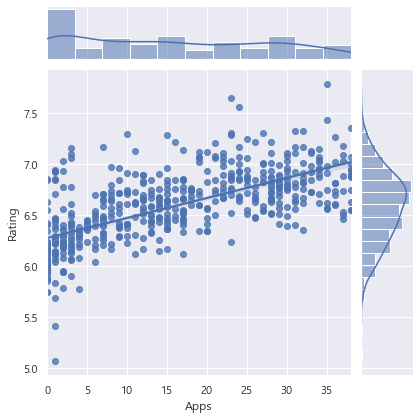

In [18]:
sns.jointplot(data=df, x='Apps', y='Rating', kind='reg')

<br>
<br>

### 출전 경기 수가 많아질수록 평점이 올라가는 것을 볼 수 있다. ( 젊고 유망한 선수들이 출전 경기 수가 많으며 평점 또한 높다.)

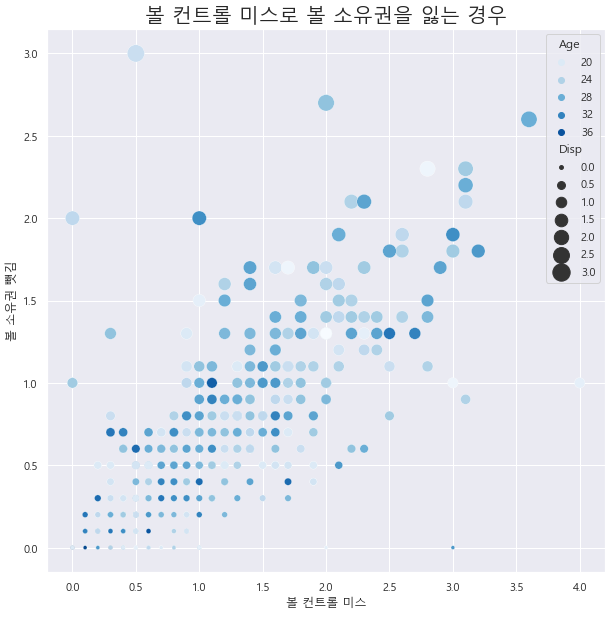

In [19]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df, # 데이터를 불러옵니다. 
                x='UnsTch', # x 축으로 볼 컨트롤 미스 데이터를 불러옵니다.
                y='Disp', # y 축으로 볼 소유권 데이터를 불러옵니다.
                hue='Age', # 나이를 기준으로 색상을 다르게 분류합니다.
                palette='Blues',  # 색상을 설정합니다.
                size='Disp', # 볼 소유권을 기준으로 크기를 다르게 분류합니다.
                sizes=(15,300)
               )
plt.title('볼 컨트롤 미스로 볼 소유권을 잃는 경우', fontsize=(20))
plt.xlabel('볼 컨트롤 미스')
plt.ylabel('볼 소유권 뺏김')
plt.show()

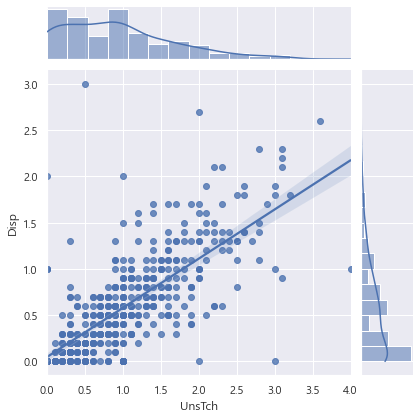

In [20]:
sns.jointplot(data=df, x='UnsTch', y='Disp', kind='reg')

<br>
<br>

### 볼 컨트롤을 미스 할 경우 볼의 소유권을 잃으며, 나이가 많은 선수들 보다 경험이 적은 어린 선수들이 컨트롤 미스가 많으며, epl 특성상 강한 압박이 많기 때문에 나이가 많은 노련한 선수들이 소유권을 잃는 경우가 적은 것으로 보인다.

<br>
<br>

## 2. 출전시간 1000분을 기준으로 상위(30) 선수 분석

In [21]:
df1 = df[df['Mins'] >= 1000] # 출전 시간이 1000분 이상인 선수들만으로 df1 데이터를 새로 만들어줍니다.

In [22]:
df1 # 전체 행과 열의 컬럼이 줄어든 상태입니다.

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,Rating
0,Harry Kane,Tottenham,27,"AM(C),FW",35,3087,0.67,0.41,3.9,1.4,1.5,1.7,0.4,1.5,1.8,7.79
1,Kevin De Bruyne,Man City,29,"M(CLR),FW",23,2001,0.27,0.54,3.2,3.2,1.9,1.2,0.0,1.3,1.8,7.65
2,Jack Grealish,Aston Villa,25,AM(CL),24,2184,0.25,0.41,1.9,3.1,2.5,4.2,0.3,1.5,2.1,7.56
3,Bruno Fernandes,Man Utd,26,M(CLR),35,3110,0.52,0.35,3.3,2.6,0.6,1.4,0.1,1.0,1.5,7.43
4,Tomas Soucek,West Ham,26,DMC,38,3420,0.26,0.03,1.7,0.5,0.4,1.1,0.1,0.6,1.1,7.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
441,Ibrahima Diallo,Southampton,22,DMC,10,1012,0.00,0.00,0.3,0.4,0.5,0.5,0.0,0.7,0.9,6.22
461,Rhian Brewster,Sheff Utd,21,FW,12,1125,0.00,0.00,0.9,0.4,0.3,0.5,0.1,0.7,0.7,6.17
466,Jake Livermore,West Brom,31,"D(C),DMC",15,1249,0.00,0.00,0.3,0.3,0.1,0.4,0.0,0.4,0.8,6.17
468,Karlan Grant,West Brom,23,"AM(L),FW",14,1133,0.08,0.00,0.8,0.1,0.4,0.6,0.3,0.8,1.5,6.15


In [23]:
df1.head(30)

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,Rating
0,Harry Kane,Tottenham,27,"AM(C),FW",35,3087,0.67,0.41,3.9,1.4,1.5,1.7,0.4,1.5,1.8,7.79
1,Kevin De Bruyne,Man City,29,"M(CLR),FW",23,2001,0.27,0.54,3.2,3.2,1.9,1.2,0.0,1.3,1.8,7.65
2,Jack Grealish,Aston Villa,25,AM(CL),24,2184,0.25,0.41,1.9,3.1,2.5,4.2,0.3,1.5,2.1,7.56
3,Bruno Fernandes,Man Utd,26,M(CLR),35,3110,0.52,0.35,3.3,2.6,0.6,1.4,0.1,1.0,1.5,7.43
4,Tomas Soucek,West Ham,26,DMC,38,3420,0.26,0.03,1.7,0.5,0.4,1.1,0.1,0.6,1.1,7.36
5,Mason Mount,Chelsea,22,M(CLR),32,2892,0.19,0.16,2.3,2.4,1.2,1.2,0.1,1.1,1.6,7.33
6,Sadio Mané,Liverpool,29,"AM(CLR),FW",31,2813,0.35,0.22,2.7,1.7,2.3,2.2,0.9,1.7,2.9,7.33
7,Riyad Mahrez,Man City,30,AM(CLR),23,1955,0.41,0.28,2.1,1.6,1.7,1.1,0.3,1.1,1.7,7.31
8,João Cancelo,Man City,27,"D(LR),M(R)",27,2302,0.08,0.12,1.3,1.6,1.7,0.6,0.1,0.8,1.3,7.31
10,Nathaniel Phillips,Liverpool,24,D(C),15,1456,0.06,0.06,0.9,0.4,0.1,0.5,0.0,0.2,0.5,7.29


In [24]:
name_goals = ['Name', 'Goals'] # Name과 Goals 데이터를 따로 추출하여 새로운 변수를 만듭니다.
top30_g = df1[name_goals].groupby('Name').mean().sort_values('Goals', ascending=False) # 새로 만든 name_goals와 Name 데이터와 그룹화한 뒤 평균을 구하여 Goals의 value 값으로 정렬합니다.(내림차순) 
top30_g = top30_g.head(30).reset_index() # 상위 30의 값을 재설정 해줍니다.

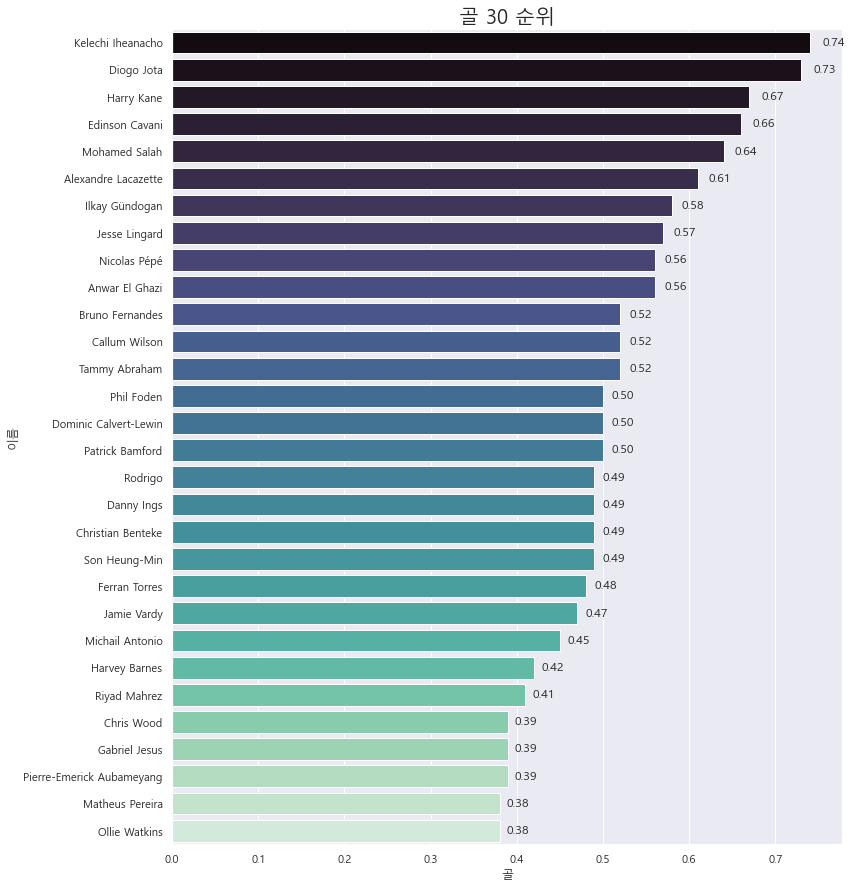

In [25]:
plt.figure(figsize=(12,15))
ax = sns.barplot(data=top30_g, # 30 골 데이터를 불러옵니다.
                 x='Goals', # x 축으로 골 데이터를 불러옵니다.
                 y=top30_g.Name, # y 축으로 골 30(이름) 데이터를 불러옵니다.
                 palette='mako') # 색상을 지정해줍니다.
plt.title('골 30 순위', fontsize=(20))
plt.xlabel('골')
plt.ylabel('이름')

for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.02, y+height/2, "%.2f"%(width), va='center') 
    # 소수점 둘재짜리까지 값들의 수치를 표시합니다.
plt.show()

In [26]:
name_assists = ['Name', 'Assists'] # Name과 Assists 데이터를 따로 추출하여 새로운 변수를 만듭니다.
top_30_a = df1[name_assists].groupby('Name').mean().sort_values('Assists', ascending=False) # 새로 만든 name_assists와 Name 데이터와 그룹화한 뒤 평균을 구하여 Assists의 value 값으로 정렬합니다.(내림차순) 
top_30_a = top_30_a.head(30).reset_index() # 상위 30의 값을 재설정 해줍니다.

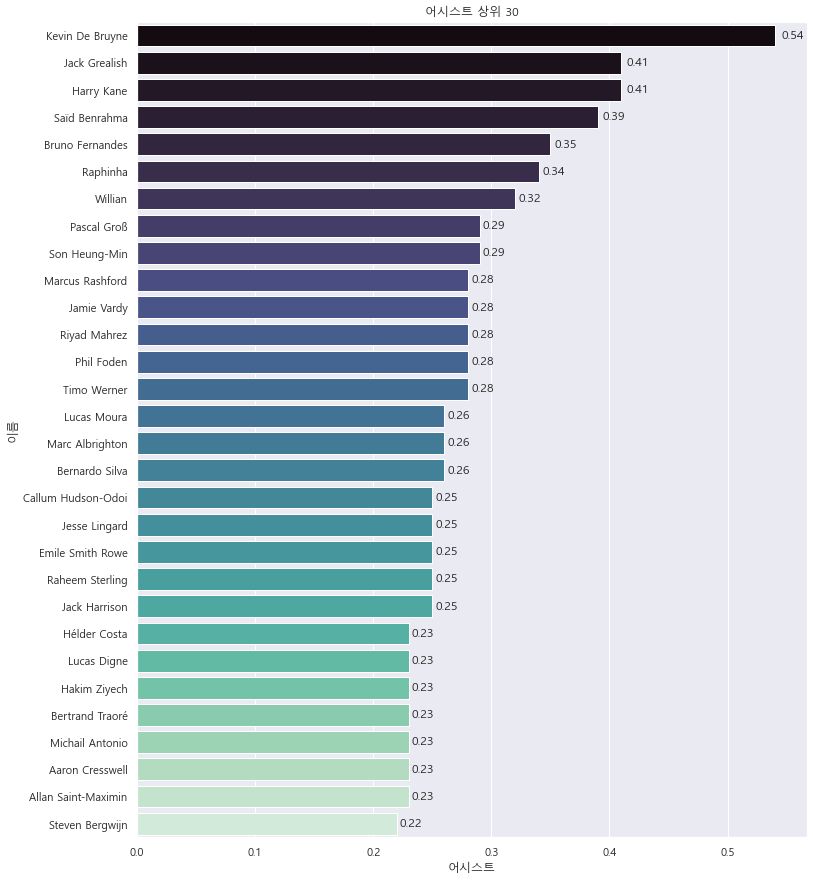

In [27]:
plt.figure(figsize=(12,15))
ax = sns.barplot(data=top_30_a, # 30 어시스트 데이터를 불러옵니다.
                 x='Assists', # x 축으로 어시스트 데이터를 불러옵니다.
                 y=top_30_a.Name, # y 축으로 어시스트 30(이름) 데이터를 불러옵니다.
                 palette='mako') # 색상을 지정해줍니다.
plt.title('어시스트 상위 30')
plt.xlabel('어시스트')
plt.ylabel('이름')

for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.2f"%(width), va='center')
    # 소수점 둘재짜리까지 값들의 수치를 표시합니다.
plt.show()

In [28]:
name_rating = ['Name', 'Rating'] # Name과 Rating 데이터를 따로 추출하여 새로운 변수를 만듭니다.
top_30_r = df1[name_rating].groupby('Name').mean().sort_values('Rating', ascending=False) # 새로 만든 name_rating와 Name 데이터와 그룹화한 뒤 평균을 구하여 Rating의 value 값으로 정렬합니다.(내림차순) 
top_30_r = top_30_r.head(30).reset_index() # 상위 30의 값을 재설정 해줍니다.

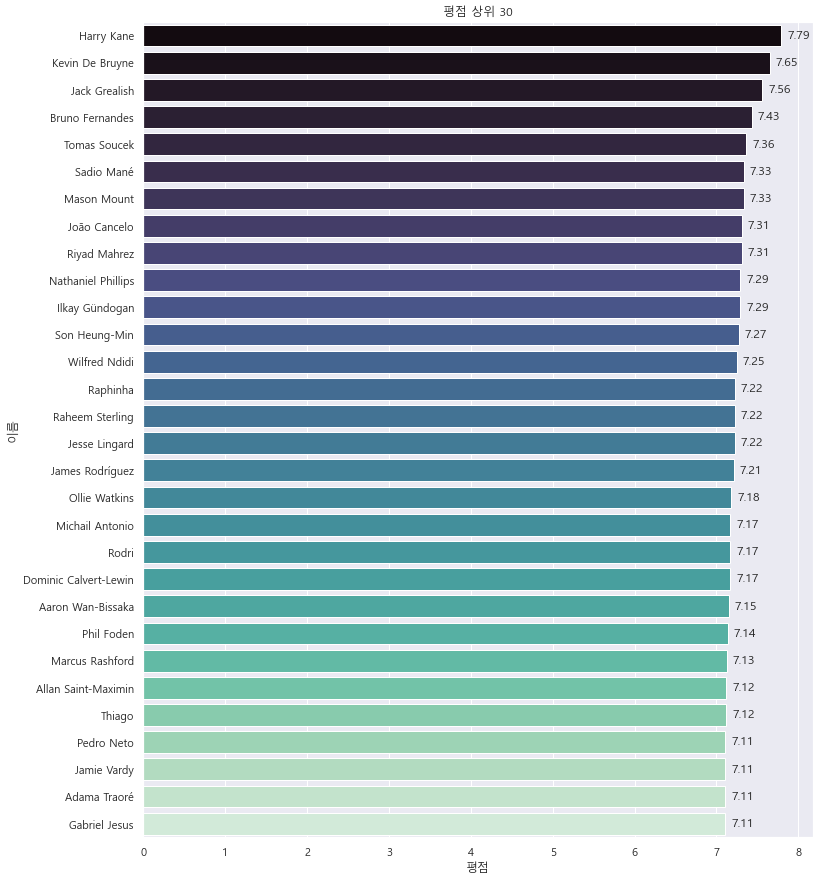

In [29]:
plt.figure(figsize=(12,15))
ax = sns.barplot(data=top_30_r, # 30 평점 데이터를 불러옵니다.
                 x='Rating', # x 축으로 평점 데이터를 불러옵니다.
                 y=top_30_r.Name, # y 축으로 평점 30(이름) 데이터를 불러옵니다.
                 palette='mako')
plt.title('평점 상위 30')
plt.xlabel('평점')
plt.ylabel('이름')

for p in ax.patches:
    x, y, width, height = p.get_bbox().bounds
    ax.text(width*1.01, y+height/2, "%.2f"%(width), va='center')
    # 소수점 둘재짜리까지 값들의 수치를 표시합니다.
plt.show()

<br>
<br>

## 3. 머신러닝의 회귀 분석으로 평점 예측

In [88]:
df.head(5)

,Name,Team,Age,Position,Apps,Mins,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,Rating
0,Harry Kane,Tottenham,27,"AM(C),FW",35,3087,0.67,0.41,3.9,1.4,1.5,1.7,0.4,1.5,1.8,7.79
1,Kevin De Bruyne,Man City,29,"M(CLR),FW",23,2001,0.27,0.54,3.2,3.2,1.9,1.2,0.0,1.3,1.8,7.65
2,Jack Grealish,Aston Villa,25,AM(CL),24,2184,0.25,0.41,1.9,3.1,2.5,4.2,0.3,1.5,2.1,7.56
3,Bruno Fernandes,Man Utd,26,M(CLR),35,3110,0.52,0.35,3.3,2.6,0.6,1.4,0.1,1.0,1.5,7.43
4,Tomas Soucek,West Ham,26,DMC,38,3420,0.26,0.03,1.7,0.5,0.4,1.1,0.1,0.6,1.1,7.36


In [89]:
df.columns

Index(['Name', 'Team', 'Age', 'Position', 'Apps', 'Mins', 'Goals', 'Assists',
       'SpG', 'KeyP', 'Drb', 'Fouled', 'Off', 'Disp', 'UnsTch', 'Rating'],
      dtype='object')

In [102]:
df_input = df[['Age', 'Apps', 'Mins','Goals','Assists', 'SpG', 'KeyP', 'Drb', 'Fouled', 'Off',
   'Disp', 'UnsTch']] # 예측에 사용될 데이터들을 input 변수에 넣어줍니다.

In [103]:
df_target = df['Rating'] # 예측에 사용될 평점을 target 변수에 넣어줍니다.

In [104]:
print(df_input)

     Age  Apps  Mins  Goals  Assists  SpG  KeyP  Drb  Fouled  Off  Disp  \
0     27    35  3087   0.67     0.41  3.9   1.4  1.5     1.7  0.4   1.5   
1     29    23  2001   0.27     0.54  3.2   3.2  1.9     1.2  0.0   1.3   
2     25    24  2184   0.25     0.41  1.9   3.1  2.5     4.2  0.3   1.5   
3     26    35  3110   0.52     0.35  3.3   2.6  0.6     1.4  0.1   1.0   
4     26    38  3420   0.26     0.03  1.7   0.5  0.4     1.1  0.1   0.6   
..   ...   ...   ...    ...      ...  ...   ...  ...     ...  ...   ...   
527   19     0    12   0.00     0.00  0.0   0.0  0.0     0.0  0.0   0.0   
528   31     0     9   0.00     0.00  0.0   0.0  0.0     0.0  0.0   2.0   
529   19     1     3   0.00     0.00  0.0   0.0  0.0     0.5  0.0   0.0   
530   39     1    90   0.00     0.00  0.0   0.0  0.0     0.0  0.0   0.0   
531   20     1    90   0.00     0.00  0.0   0.0  0.0     0.0  0.0   0.0   

     UnsTch  
0       1.8  
1       1.8  
2       2.1  
3       1.5  
4       1.1  
..      ...  
5

In [105]:
print(df_target)

0      7.79
1      7.65
2      7.56
3      7.43
4      7.36
       ... 
527    5.74
528    5.74
529    5.68
530    5.41
531    5.06
Name: Rating, Length: 532, dtype: float64


In [106]:
# 데이터셋 나누기
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_input, 
                                                    df_target,
                                                   test_size=0.3, # 7:3 비율로 데이터를 나누어 줍니다. 
                                                    random_state=2021 # 동일한 분배를 위해 random_state 값을 지정해줍니다.)

In [107]:
# 회귀모델 정의
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [108]:
# 평점 예측을 위해 임의의 데이터를 입력한다
new_data = [[20, 23, 2184, 0.23, 0.35, 2.3, 2.1, 1.2, 1.4, 0.3, 1.3, 2.1 ]]
predictions = lr.predict(new_data)

In [109]:
print(predictions) # 6.9점이라는 평점을 예측

[6.98577377]


In [110]:
y_predict = lr.predict(x_test)

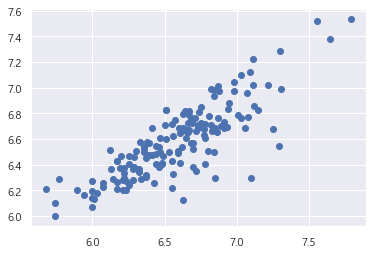

In [111]:
# 예측 평점과 실제 평점 그래프 출력
plt.scatter(y_test, y_predict) # 6.0 ~ 7.0 사이의 값은 비슷하게 평점 예측

In [114]:
print(lr.score(x_train, y_train)) # 훈련셋의 정확도 61%
print(lr.score(x_test, y_test)) # 테스트셋의 정화도 68%

0.6106662330461581
0.6811649802561339
